In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data" / "raw"

train = pd.read_csv(DATA_DIR / "train.csv", sep="|")
items = pd.read_csv(DATA_DIR / "items.csv", sep="|")

In [15]:
train.head()

,lineID,day,pid,adFlag,availability,competitorPrice,click,basket,order,price,revenue,price_diff
0,1,1,6570,0,2,14.60,1,0,0,16.89,0.00,2.29
1,2,1,14922,1,1,8.57,0,1,0,8.75,0.00,0.18
2,3,1,16382,0,1,14.77,0,1,0,16.06,0.00,1.29
3,4,1,1145,1,1,6.59,0,0,1,6.55,6.55,-0.04
4,5,1,3394,0,1,4.39,0,0,1,4.14,4.14,-0.25


In [5]:
train.columns

Index(['lineID', 'day', 'pid', 'adFlag', 'availability', 'competitorPrice',
       'click', 'basket', 'order', 'price', 'revenue'],
      dtype='str')

In [6]:
train["order"].value_counts(normalize=True)

order
0    0.744162
1    0.255838
Name: proportion, dtype: float64

### Insight: Class Distribution

Approximately 25.6% of product interactions result in a purchase.
This means roughly 1 out of 4 interactions leads to an order.
The dataset is moderately imbalanced but still suitable for classification.

In [7]:
result = train.groupby("order")["price"].mean()
print(result)

order
0    14.494285
1    11.976277
Name: price, dtype: float64


### Insight: Price Sensitivity

Purchased products have significantly lower average prices compared
to non-purchased products, indicating strong customer price sensitivity.
This confirms that price is a critical driver in the dynamic pricing strategy.

In [8]:
result_comp = train.groupby("order")["competitorPrice"].mean()
print(result_comp)


order
0    13.348660
1    11.129068
Name: competitorPrice, dtype: float64


In [9]:
train["price_diff"] = train["price"] - train["competitorPrice"]

result_diff = train.groupby("order")["price_diff"].mean()
print(result_diff)

order
0    0.894889
1    0.779847
Name: price_diff, dtype: float64


### Insight: Competitive Price Gap

The pharmacy is generally priced slightly above competitors.
However, the price gap is smaller for purchased products.
This suggests that reducing the price difference relative to competitors
increases the likelihood of purchase.

In [10]:
result_ad = train.groupby("order")["adFlag"].mean()
print(result_ad)

order
0    0.289366
1    0.400464
Name: adFlag, dtype: float64


### Insight: Advertising Effect

Advertised products show a significantly higher purchase rate.
40% of purchased products were part of a marketing campaign,
compared to only 29% of non-purchased products.

This indicates that advertising positively influences
conversion probability and should be included as
an important predictor in the classification model.

In [11]:
train.groupby("adFlag")["order"].mean()

adFlag
0    0.224834
1    0.322396
Name: order, dtype: float64

### Insight: Direct Impact of Advertising on Conversion

Products that are advertised have a purchase probability of 32.2%,
compared to only 22.5% for non-advertised products.

This represents a substantial increase in conversion rate,
highlighting the effectiveness of marketing campaigns.
Advertising should therefore be considered a key variable
in the predictive model.

In [12]:
train.groupby("availability")["order"].mean()


availability
1    0.267715
2    0.145685
3    0.103602
4    0.000290
Name: order, dtype: float64

### Insight: Strong Impact of Availability on Conversion

Purchase probability decreases sharply as availability worsens.
Products with availability level 1 show a purchase rate of 26.8%,
while products with availability level 4 are almost never purchased (0.03%).

This indicates that availability is one of the strongest predictors
of purchase behavior. Effective inventory management is therefore
crucial for revenue optimization.


In [16]:
train[["click", "basket", "order"]].mean()

click     0.574320
basket    0.169842
order     0.255838
dtype: float64

### Insight: Distribution of User Actions

Each record represents exactly one user action (click, basket, or order).
Clicks account for 57% of interactions, while purchases represent 25.6%.

This dataset does not represent a sequential funnel but rather
different types of product interactions. Therefore, purchase prediction
is modeled as a classification problem across independent interaction events.
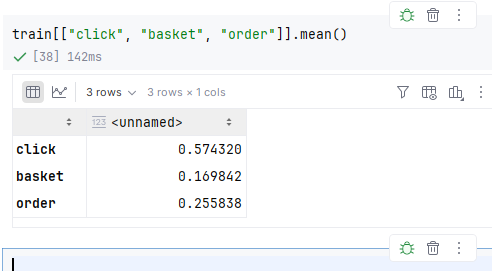